 Tabla de regresión con totales:


,x,y,xy,x²,ŷ (y_pred),y - ŷ,(y - ŷ)²
0,1,2,2,1,2.358,-0.358,0.129
1,2,3,6,4,3.208,-0.208,0.043
2,2,4,8,4,3.208,0.792,0.628
3,3,4,12,9,4.057,-0.057,0.003
4,4,4,16,16,4.906,-0.906,0.820
5,4,6,24,16,4.906,1.094,1.198
6,5,5,25,25,5.755,-0.755,0.570
7,6,7,42,36,6.604,0.396,0.157
Σ,27,35,135,111,35.000,0.000,3.547



 ación ajustada: y = 0.8491x + 1.5094
 Error cuadrático total (SSE): 3.5472


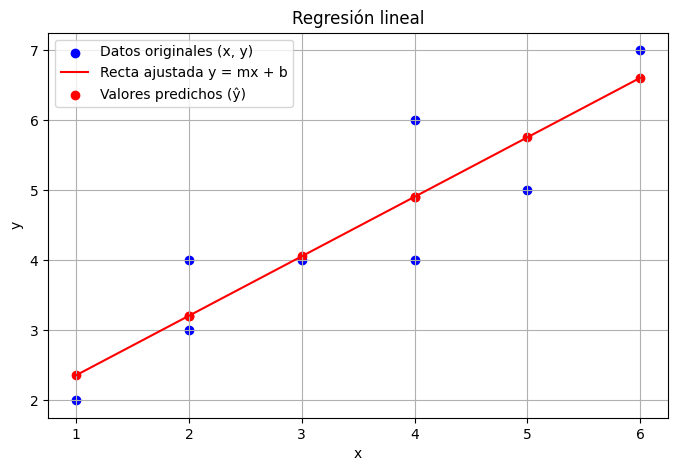

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos originales
x = [1, 2, 2, 3, 4, 4, 5, 6]
y = [2, 3, 4, 4, 4, 6, 5, 7]

# Cálculos básicos
xy = [xi * yi for xi, yi in zip(x, y)]
x2 = [xi ** 2 for xi in x]

# Sumas para coeficientes
n = len(x)
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(xy)
sum_x2 = sum(x2)

# Coeficientes de la recta: y = mx + b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
x_prom = sum_x / n
y_prom = sum_y / n
b = y_prom - m * x_prom

# Valores predichos y errores
y_pred = [m * xi + b for xi in x]
residuales = [yi - ypi for yi, ypi in zip(y, y_pred)]
residuales2 = [(yi - ypi)**2 for yi, ypi in zip(y, y_pred)]

# Crear DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'xy': xy,
    'x²': x2,
    'ŷ (y_pred)': [round(ypi, 3) for ypi in y_pred],
    'y - ŷ': [round(res, 3) for res in residuales],
    '(y - ŷ)²': [round(res2, 3) for res2 in residuales2]
})

# Agregar fila de totales
totals = {
    'x': sum_x,
    'y': sum_y,
    'xy': sum_xy,
    'x²': sum_x2,
    'ŷ (y_pred)': round(sum(y_pred), 3),
    'y - ŷ': round(sum(residuales), 3),
    '(y - ŷ)²': round(sum(residuales2), 3)
}
df.loc['Σ'] = totals

# Mostrar tabla
print(" Tabla de regresión con totales:")
display(df)

# Ecuación de la recta
print(f"\n ación ajustada: y = {m:.4f}x + {b:.4f}")
print(f" Error cuadrático total (SSE): {round(sum(residuales2), 4)}")

# Gráfica
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Datos originales (x, y)')
plt.plot(x, y_pred, color='red', label='Recta ajustada y = mx + b')
plt.scatter(x, y_pred, color='red', marker='o', label='Valores predichos (ŷ)')
plt.title('Regresión lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()